# Chapter 3 Lab 
## Mark Ilodigwe 
### 8. This question involves the use of simple linear regression on the Auto data set.
## Ignore docstrings 

(a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:
i. Is there a relationship between the predictor and the re- sponse?

ii. How strong is the relationship between the predictor and the response?

iii. Is the relationship between the predictor and the response positive or negative?

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?



(b) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

In [116]:



import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots




import warnings

# To suppress specific type of warning
warnings.filterwarnings("ignore", category=DeprecationWarning)


import statsmodels.api as sm




from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
!pip install ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [117]:
auto_df=pd.read_csv("Auto.csv")
auto_df


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [118]:
#Extra dependencies 

import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

In [119]:
#Changing all data to numeric/Removing missing values




auto_df = auto_df.drop(auto_df[auto_df.values == '?'].index)
auto_df = auto_df.reset_index()
auto_df.head()
#'''
#df['mpg'] = pd.to_numeric(df['mpg'])
#data1=df['horsepower'].replace('?', 0)
#del df['horsepower']
#df.insert(3,'horsepower',data1)
#df['horsepower'] = pd.to_numeric(df['horsepower'])
#'''

"\ndf['mpg'] = pd.to_numeric(df['mpg'])\ndata1=df['horsepower'].replace('?', 0)\ndel df['horsepower']\ndf.insert(3,'horsepower',data1)\ndf['horsepower'] = pd.to_numeric(df['horsepower'])\n"

In [120]:
datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'],
             'qual': ['origin', 'name']}

quants = auto_df[datatypes['quant']].astype(np.float_)

auto_df = pd.concat([quants, auto_df[datatypes['qual']]], axis=1)

In [121]:




#Here, putting the intercept into X with pd.concat, taking the horsepower column 
intercept_const = pd.DataFrame({'intercept': np.ones(auto_df.shape[0])})

X = pd.concat([intercept_const, auto_df['horsepower']], axis=1)
y = auto_df['mpg']


#'''
#X = df['horsepower']
#X_np = X.to_numpy(dtype=np.float64)
#y = df['mpg']
#y_np = y.to_numpy(dtype=np.float64)
##Added a constant term 
#X_np = sm.add_constant(X_np)



#model = sm.OLS(y_np, X_np)
#results = model.fit()

#'''

"\nX = df['horsepower']\nX_np = X.to_numpy(dtype=np.float64)\ny = df['mpg']\ny_np = y.to_numpy(dtype=np.float64)\n##Added a constant term \nX_np = sm.add_constant(X_np)\n\n\n\nmodel = sm.OLS(y_np, X_np)\nresults = model.fit()\n\n"

In [131]:
X = auto_df['horsepower']
X = sm.add_constant(X)     # add bias constant
y = auto_df['mpg']

results = sm.OLS(y, X).fit()
print(results.summary())

summarize(results)
#paramter[0] and [1] for slope 
results.params

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           7.03e-81
Time:                        22:47:13   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

const         39.935861
horsepower    -0.157845
dtype: float64

# iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [148]:

design= MS(['horsepower'])

design = design.fit(auto_df)


Predicted_X = design.transform(auto_df)
#Set horsepower to 98


new_df = pd.DataFrame({'horsepower':[98]})
New_X =design.transform(new_df)
New_X

new_predictions = results.get_prediction(New_X);
new_predictions.predicted_mean

array([24.46707715])

In [139]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
#Way, hardcode an array 

X_ex = np.array([1, 98])  # [1, horsepower], assuming horsepower is the only feature

# Use the predict method of your fitted model to get the prediction (based on the hardcoded array )
y_ex = results.predict(X_ex)


y_ex

array([24.46707715])

In [149]:
#95% confidence intervals 

new_predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

## Plotting 

"\ndf = pd.concat([auto_df['horsepower'], auto_df['mpg']], axis=1)\nax = sns.scatterplot(x='horsepower', y='mpg', data=df)\nax.plot(auto_df['horsepower'], y);"

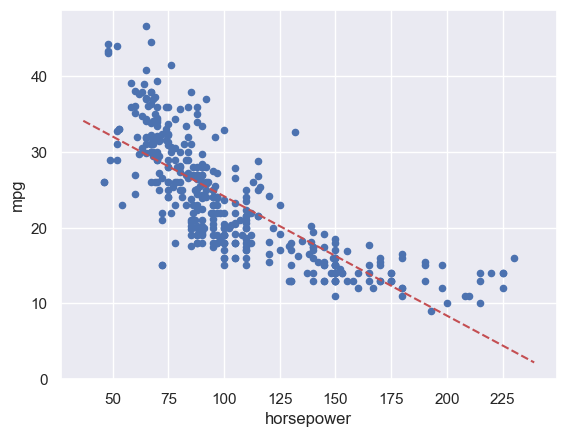

In [109]:

%matplotlib inline


#I created a function to plot with linestel. 
def abline(ax, b, m, linestyle='--'):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, linestyle)

ax = auto_df.plot.scatter('horsepower', 'mpg')
abline(ax, results.params[0], results.params[1], linestyle='r--')

    
    
\

    
#'''
#df = pd.concat([auto_df['horsepower'], auto_df['mpg']], axis=1)
#ax = sns.scatterplot(x='horsepower', y='mpg', data=df)
#ax.plot(auto_df['horsepower'], y);'''